# Plots and analysis for Monte Carlo ensembles, SSP1-RCP2.6

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import re, os
import matplotlib.pyplot as plt
%matplotlib inline

Set `projdir` on your system, then everything else is defined relative to that. `pwd` will just give the directory that this Jupyter notebook is housed in.

In [2]:
projdir = os.getcwd()
datdir = projdir + "/ciam-code/output/MonteCarlo"
plotdir = projdir + "/ciam-code/figures"

If the plot directory `plotdir` doesn't exist, make it.

In [3]:
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
print("Will save plots to ",plotdir)

Will save plots to  /Users/aewsma/codes/CIAM_uncertainty_propagation/ciam-code/figures


## Read Monte Carlo simulation results

### 5th, 50th and 95th percentiles only (single simulations)

In [4]:
df05 = pd.read_csv(datdir+"/SSP1_BRICK26_p5/CIAM 2021-07-17 09-09-40 MC1/PostProcessing/globalnpv_SSP1_BRICK26_p5.csv")
df50 = pd.read_csv(datdir+"/SSP1_BRICK26_p50/CIAM 2021-07-17 09-10-05 MC1/PostProcessing/globalnpv_SSP1_BRICK26_p50.csv")
df95 = pd.read_csv(datdir+"/SSP1_BRICK26_p95/CIAM 2021-07-17 09-10-29 MC1/PostProcessing/globalnpv_SSP1_BRICK26_p95.csv")

In [5]:
df05r = pd.read_csv(datdir+"/SSP1_BRICK26_p5/CIAM 2021-07-17 09-09-40 MC1/PostProcessing/regionnpv_SSP1_BRICK26_p5.csv")
df50r = pd.read_csv(datdir+"/SSP1_BRICK26_p50/CIAM 2021-07-17 09-10-05 MC1/PostProcessing/regionnpv_SSP1_BRICK26_p50.csv")
df95r = pd.read_csv(datdir+"/SSP1_BRICK26_p95/CIAM 2021-07-17 09-10-29 MC1/PostProcessing/regionnpv_SSP1_BRICK26_p95.csv")
regions = df05r.columns

In [6]:
df05 = df05.join(df05r)
df50 = df50.join(df50r)
df95 = df95.join(df95r)

### SLR uncertainty only

In [7]:
slrdir = datdir + "/SSP1_BRICK26_varySLR/CIAM 2021-07-17 03-44-05 MC1000/PostProcessing"
dfS = pd.read_csv(slrdir+"/globalnpv_SSP1_BRICK26_varySLR.csv")
dfS = dfS.join(pd.read_csv(slrdir+"/regionnpv_SSP1_BRICK26_varySLR.csv"))

### CIAM socioeconomic parameter uncertainty only

In [8]:
ciamdir = datdir + "/SSP1_BRICK26_varyCIAM/CIAM 2021-07-16 22-20-26 MC1000/PostProcessing"
dfC = pd.read_csv(ciamdir+"/globalnpv_SSP1_BRICK26_varyCIAM.csv")
dfC = dfC.join(pd.read_csv(ciamdir+"/regionnpv_SSP1_BRICK26_varyCIAM.csv"))

### Both SLR and CIAM uncertainty

In [9]:
bothdir = datdir + "/SSP1_BRICK26_varySLR_varyCIAM/CIAM 2021-07-16 16-58-18 MC1000/PostProcessing"
dfSC = pd.read_csv(bothdir+"/globalnpv_SSP1_BRICK26_varySLR_varyCIAM.csv")
dfSC = dfSC.join(pd.read_csv(bothdir+"/regionnpv_SSP1_BRICK26_varySLR_varyCIAM.csv"))

### Histogram

KDE version

In [10]:
kde = {}
kde["S"] = stats.gaussian_kde(dfS.npv)
kde["C"] = stats.gaussian_kde(dfC.npv)
kde["SC"] = stats.gaussian_kde(dfSC.npv)

x = np.linspace(0,12000,500)
kde_plot = {}
for k in kde.keys():
    kde_plot[k] = kde[k](x)

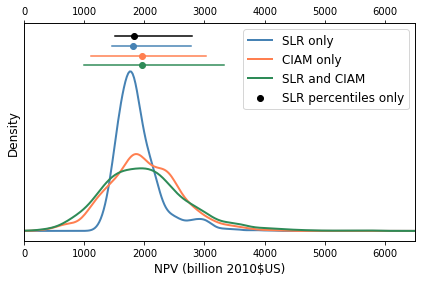

In [11]:
fig, ax = plt.subplots(1,1,figsize=(7,4))
plt.plot(x,kde_plot["S"], linewidth=2, color="steelblue", label="SLR only")
plt.plot(x,kde_plot["C"], linewidth=2, color="coral", label="CIAM only")
plt.plot(x,kde_plot["SC"], linewidth=2, color="seagreen", label="SLR and CIAM")
y0 = 0.0018; dy = 0.00009
plt.plot([df05.npv, df95.npv], [y0, y0], color="black"); plt.scatter(df50.npv, y0, color="black", label="SLR percentiles only")
y0 -= dy
plt.plot([dfS.npv.quantile(0.05), dfS.npv.quantile(0.95)], [y0, y0], color="steelblue"); plt.scatter(dfS.npv.median(), y0, color="steelblue")
y0 -= dy
plt.plot([dfC.npv.quantile(0.05), dfC.npv.quantile(0.95)], [y0, y0], color="coral"); plt.scatter(dfC.npv.median(), y0, color="coral")
y0 -= dy
plt.plot([dfSC.npv.quantile(0.05), dfSC.npv.quantile(0.95)], [y0, y0], color="seagreen"); plt.scatter(dfSC.npv.median(), y0, color="seagreen")
plt.xlabel("NPV (billion 2010$US)", fontsize=12); plt.ylabel("Density", fontsize=12); plt.yticks([])
plt.xlim([0,6500])
plt.legend(fontsize=12, frameon=True)
ax1 = plt.gca()
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
fig.savefig(plotdir+"/global_damages_ssp1-rcp26.pdf", bbox_inches='tight');

In [12]:
print("5th, 50th, 95th, and 95-5th percentiles")
print("Percentiles only:      ",np.transpose(np.round([df05.npv, df50.npv, df95.npv, df95.npv-df05.npv], 2))[0])
print("SLR-only ensemble:     ",np.round([dfS.npv.quantile(.05), dfS.npv.quantile(.5), dfS.npv.quantile(.95), dfS.npv.quantile(.95)-dfS.npv.quantile(.05)], 2))
print("CIAM-only ensemble:    ",np.round([dfC.npv.quantile(.05), dfC.npv.quantile(.5), dfC.npv.quantile(.95), dfC.npv.quantile(.95)-dfC.npv.quantile(.05)], 2))
print("SLR and CIAM ensemble: ",np.round([dfSC.npv.quantile(.05), dfSC.npv.quantile(.5), dfSC.npv.quantile(.95), dfSC.npv.quantile(.95)-dfSC.npv.quantile(.05)], 2))

5th, 50th, 95th, and 95-5th percentiles
Percentiles only:       [1510.05 1832.15 2785.4  1275.34]
SLR-only ensemble:      [1466.83 1814.88 2782.31 1315.48]
CIAM-only ensemble:     [1104.55 1955.23 3022.01 1917.47]
SLR and CIAM ensemble:  [ 987.54 1953.34 3322.09 2334.55]


### Write to CSV file for Supplemental Material

In [13]:
percentiles_out = [0,0.01,0.025,0.05,0.17,0.25,0.5,0.75,0.83,0.95,0.975,0.99,1]
dfOut = pd.DataFrame(data={"percentile" : percentiles_out,
                           "percentiles-only" : [np.nan,np.nan,np.nan,df05.npv[0],np.nan,np.nan,df50.npv[0],np.nan,np.nan,df95.npv[0],np.nan,np.nan,np.nan],
                           "SLR-only" : dfS.npv.quantile(percentiles_out),
                           "CIAM-only" : dfC.npv.quantile(percentiles_out),
                           "SLR and CIAM" : dfSC.npv.quantile(percentiles_out)
                          })
filename_out = datdir+"/FigureData_global_totalNPV_ensembles_SSP1-RCP26.csv"
dfOut.to_csv(filename_out, index=False)
print(dfOut)

       percentile  percentiles-only     SLR-only    CIAM-only  SLR and CIAM
0.000       0.000               NaN  1234.646171   349.224762    242.072340
0.010       0.010               NaN  1367.435492   665.136208    695.428658
0.025       0.025               NaN  1397.685844   828.304568    820.775580
0.050       0.050       1510.051820  1466.831167  1104.546532    987.536381
0.170       0.170               NaN  1594.320677  1442.295131   1370.499996
0.250       0.250               NaN  1656.487004  1600.744999   1519.148936
0.500       0.500       1832.149588  1814.880486  1955.230456   1953.344072
0.750       0.750               NaN  2036.871976  2384.625728   2399.174567
0.830       0.830               NaN  2152.129450  2511.059102   2641.761141
0.950       0.950       2785.395612  2782.309578  3022.013832   3322.085204
0.975       0.975               NaN  2997.156077  3248.143360   3643.598633
0.990       0.990               NaN  3208.435567  3545.328422   4177.227010
1.000       

## Aggregate by World Bank region (7 of them) and compute total NPV as %GDP (2010)

### GDP per capita

Grabbing just the first year (2010). All in US$2010.

In [14]:
ypcc = pd.read_csv(projdir+"/ciam-code/data/ssp/ypcc_IIASAGDP_SSP5_v9_130219.csv")
dfGP = pd.DataFrame()
dfGP["rgn"] = ypcc.columns[1:]
dfGP["gdp_per_capita"] = np.array(ypcc.iloc[0][1:])

### population (millions)

In [15]:
pop = pd.read_csv(projdir+"/ciam-code/data/ssp/pop_IIASAGDP_SSP5_v9_130219.csv")
dfGP["pop"] = np.array(pop.iloc[0][1:])

### get total GDP

In [16]:
dfGP["gdp"] = dfGP["gdp_per_capita"]*dfGP["pop"]*1e6/1e9 
# 1e6 since population is in units of millions
# and /1e9 to get in units of billions US$2010

### mapping of segments/regions in CIAM, to the 7 World Bank regions

gdp is in units of billions US$2010, since hte NPV results are also billions

In [17]:
wbsegs = pd.read_csv(projdir+"/ciam-code/data/segments_regions_WB.csv")
regions = list(wbsegs["global region"].unique())
rgn_gdp = {}
for rgn in regions:
    rgns_this_rgn = wbsegs.loc[wbsegs["global region"]==rgn, "regions"].unique()
    rgn_gdp[rgn] = dfGP.loc[dfGP["rgn"].isin(rgns_this_rgn),"gdp"].sum()

Check:

In [18]:
print(rgn_gdp)

{'Europe and Central Asia': 18966.976402719152, 'Middle East and North Africa': 3938.501973598944, 'Sub-Saharan Africa': 1362.4469249975007, 'Latin America and the Caribbean': 6594.935674050595, 'East Asia and Pacific': 23439.597988189, 'South Asia': 5258.98316979206, 'North America': 15789.464594560679}


### compute the NPV as %GDP (in 2010)

In [19]:
for rgn in regions:
    dfS["npv/gpd "+rgn] = 100*dfS[rgn]/rgn_gdp[rgn]
    dfC["npv/gpd "+rgn] = 100*dfC[rgn]/rgn_gdp[rgn]
    dfSC["npv/gpd "+rgn] = 100*dfSC[rgn]/rgn_gdp[rgn]

world NPV as %GDP

In [20]:
dfS["npv/gpd"] = 100*dfS["npv"]/np.sum(list(rgn_gdp.values()))
dfC["npv/gpd"] = 100*dfC["npv"]/np.sum(list(rgn_gdp.values()))
dfSC["npv/gpd"] = 100*dfSC["npv"]/np.sum(list(rgn_gdp.values()))

<br>

# Density estimates for each region

<br>

In [21]:
kde = {}
kde["S"] = {}; kde["C"] = {}; kde["SC"] = {}
kde["S"]["World"] = stats.gaussian_kde(dfS["npv/gpd"])
kde["C"]["World"] = stats.gaussian_kde(dfC["npv/gpd"])
kde["SC"]["World"] = stats.gaussian_kde(dfSC["npv/gpd"])
for rgn in regions:
    kde["S"][rgn] = stats.gaussian_kde(dfS["npv/gpd "+rgn])
    kde["C"][rgn] = stats.gaussian_kde(dfC["npv/gpd "+rgn])
    kde["SC"][rgn] = stats.gaussian_kde(dfSC["npv/gpd "+rgn])
    
x = np.linspace(0,10,200)
kde_plot = {}
kde_plot["S"] = {}; kde_plot["C"] = {}; kde_plot["SC"] = {}
kde_plot["S"]["World"] = kde["S"]["World"](x)
kde_plot["C"]["World"] = kde["C"]["World"](x)
kde_plot["SC"]["World"] = kde["SC"]["World"](x)
for rgn in regions:
    kde_plot["S"][rgn] = kde["S"][rgn](x)
    kde_plot["C"][rgn] = kde["C"][rgn](x)
    kde_plot["SC"][rgn] = kde["SC"][rgn](x)

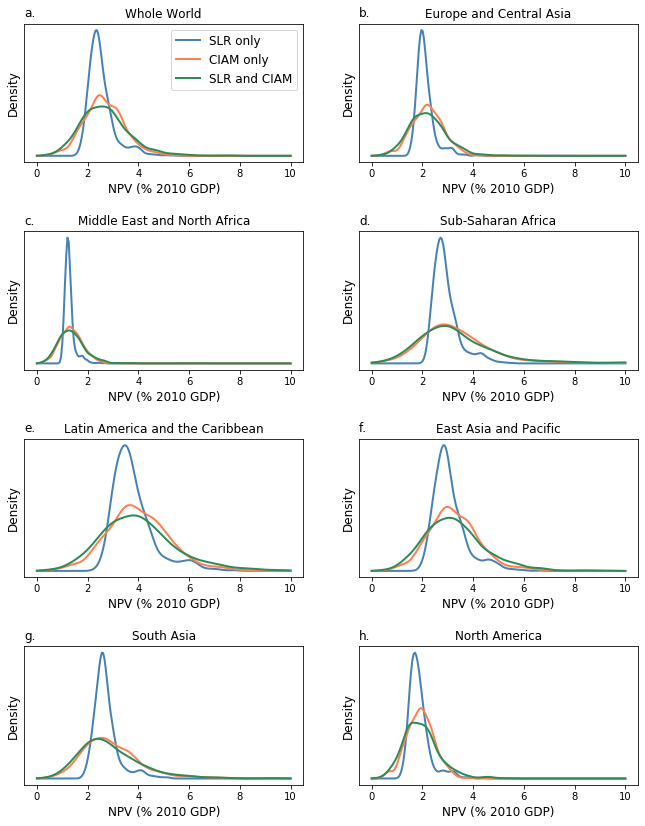

In [22]:
# from above

fig, ax = plt.subplots(4,2,figsize=(11,14))
fig.subplots_adjust(hspace=.5)
bins = range(0,20,1)
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

# whole world
rgn = "World"
pan = 0
ax[0][0].plot(x, kde_plot["S"][rgn], linewidth=2, color="steelblue", label="SLR only")
ax[0][0].plot(x, kde_plot["C"][rgn], linewidth=2, color="coral", label="CIAM only")
ax[0][0].plot(x, kde_plot["SC"][rgn], linewidth=2, color="seagreen", label="SLR and CIAM")
ax[0][0].set_xlabel("NPV (% 2010 GDP)", fontsize=12)
ax[0][0].set_ylabel("Density", fontsize=12); ax[0][0].set_yticks([])
ax[0][0].legend(fontsize=12, frameon=True)
ax[0][0].set_title("Whole World")
#ylims = ax[0][0].get_ylim(); top = ylims[1]+.05*(ylims[1]-ylims[0]); ax[0][0].text(-0.5,top,"a.", fontsize=12)
ylims = ax[0][0].get_ylim(); top = ylims[1]*1.05; ax[0][0].text(-0.5,top, panels[pan], fontsize=12);

# regions
rgn = regions[0]
pan += 1
ax[0][1].plot(x, kde_plot["S"][rgn], linewidth=2, color="steelblue", label="SLR only")
ax[0][1].plot(x, kde_plot["C"][rgn], linewidth=2, color="coral", label="CIAM only")
ax[0][1].plot(x, kde_plot["SC"][rgn], linewidth=2, color="seagreen", label="SLR and CIAM")
ax[0][1].set_xlabel("NPV (% 2010 GDP)", fontsize=12)
ax[0][1].set_ylabel("Density", fontsize=12); ax[0][1].set_yticks([])
ax[0][1].set_title(rgn)
ylims = ax[0][1].get_ylim(); top = ylims[1]*1.05; ax[0][1].text(-0.5,top, panels[pan], fontsize=12);

ir = 1
for row in range(1,4):
    for col in range(2):
        rgn = regions[ir]
        ir += 1
        pan += 1
        ax[row][col].plot(x, kde_plot["S"][rgn], linewidth=2, color="steelblue", label="SLR only")
        ax[row][col].plot(x, kde_plot["C"][rgn], linewidth=2, color="coral", label="CIAM only")
        ax[row][col].plot(x, kde_plot["SC"][rgn], linewidth=2, color="seagreen", label="SLR and CIAM")
        ax[row][col].set_xlabel("NPV (% 2010 GDP)", fontsize=12)
        ax[row][col].set_ylabel("Density", fontsize=12); ax[row][col].set_yticks([])
        ax[row][col].set_title(rgn)
        ylims = ax[row][col].get_ylim(); top = ylims[1]*1.05; ax[row][col].text(-0.5,top, panels[pan], fontsize=12);

fig.savefig(plotdir+"/regional_damages_ssp1-rcp26.pdf", bbox_inches='tight')

Regional numbers

In [23]:
print("5th, 50th, 95th, and 95-5th percentiles")
for rgn in regions:
    print("====================================================")
    print(rgn)
    print("SLR-only ensemble:     ",np.round([dfS["npv/gpd "+rgn].quantile(.05), dfS["npv/gpd "+rgn].quantile(.5), dfS["npv/gpd "+rgn].quantile(.95), dfS["npv/gpd "+rgn].quantile(.95)-dfS["npv/gpd "+rgn].quantile(.05)], 2))
    print("CIAM-only ensemble:    ",np.round([dfC["npv/gpd "+rgn].quantile(.05), dfC["npv/gpd "+rgn].quantile(.5), dfC["npv/gpd "+rgn].quantile(.95), dfC["npv/gpd "+rgn].quantile(.95)-dfC["npv/gpd "+rgn].quantile(.05)], 2))
    print("SLR and CIAM ensemble: ",np.round([dfSC["npv/gpd "+rgn].quantile(.05), dfSC["npv/gpd "+rgn].quantile(.5), dfSC["npv/gpd "+rgn].quantile(.95), dfSC["npv/gpd "+rgn].quantile(.95)-dfSC["npv/gpd "+rgn].quantile(.05)], 2))

5th, 50th, 95th, and 95-5th percentiles
Europe and Central Asia
SLR-only ensemble:      [1.71 2.03 2.9  1.19]
CIAM-only ensemble:     [1.23 2.19 3.27 2.04]
SLR and CIAM ensemble:  [1.12 2.15 3.51 2.39]
Middle East and North Africa
SLR-only ensemble:      [1.06 1.24 1.73 0.67]
CIAM-only ensemble:     [0.67 1.33 2.14 1.47]
SLR and CIAM ensemble:  [0.63 1.32 2.29 1.65]
Sub-Saharan Africa
SLR-only ensemble:      [2.35 2.8  4.14 1.78]
CIAM-only ensemble:     [1.54 3.09 6.33 4.79]
SLR and CIAM ensemble:  [1.44 3.05 6.61 5.18]
Latin America and the Caribbean
SLR-only ensemble:      [2.89 3.61 5.71 2.82]
CIAM-only ensemble:     [2.12 3.9  6.08 3.95]
SLR and CIAM ensemble:  [1.94 3.87 6.86 4.93]
East Asia and Pacific
SLR-only ensemble:      [2.31 2.93 4.56 2.26]
CIAM-only ensemble:     [1.79 3.17 4.9  3.12]
SLR and CIAM ensemble:  [1.56 3.17 5.56 4.  ]
South Asia
SLR-only ensemble:      [2.15 2.62 3.89 1.74]
CIAM-only ensemble:     [1.42 2.76 4.97 3.55]
SLR and CIAM ensemble:  [1.31 2.68 5.25 3

### Write to CSV files for Supplemental Material

First, as percent of regional GDP

In [24]:
percentiles_out = [0,0.01,0.025,0.05,0.17,0.25,0.5,0.75,0.83,0.95,0.975,0.99,1]

rgn_dict = {"percentile" : percentiles_out}
for rgn in regions:
    rgn_dict["SLR-only "+rgn] = dfS["npv/gpd "+rgn].quantile(percentiles_out)
    rgn_dict["CIAM-only "+rgn] = dfC["npv/gpd "+rgn].quantile(percentiles_out)
    rgn_dict["SLR and CIAM "+rgn] = dfSC["npv/gpd "+rgn].quantile(percentiles_out)
dfOut = pd.DataFrame(data=rgn_dict)

filename_out = datdir+"/FigureData_regional_percentGDP_ensembles_SSP1-RCP26.csv"
dfOut.to_csv(filename_out, index=False)
print(dfOut)

       percentile  SLR-only Europe and Central Asia  \
0.000       0.000                          1.501868   
0.010       0.010                          1.591630   
0.025       0.025                          1.645813   
0.050       0.050                          1.710137   
0.170       0.170                          1.836263   
0.250       0.250                          1.888413   
0.500       0.500                          2.033474   
0.750       0.750                          2.224793   
0.830       0.830                          2.327356   
0.950       0.950                          2.901835   
0.975       0.975                          3.148639   
0.990       0.990                          3.317805   
1.000       1.000                          4.337244   

       CIAM-only Europe and Central Asia  \
0.000                           0.367217   
0.010                           0.674435   
0.025                           0.866503   
0.050                           1.227276   
0.170    

Now as actual NPV

In [25]:
percentiles_out = [0,0.01,0.025,0.05,0.17,0.25,0.5,0.75,0.83,0.95,0.975,0.99,1]

rgn_dict = {"percentile" : percentiles_out}
for rgn in regions:
    rgn_dict["SLR-only "+rgn] = dfS[rgn].quantile(percentiles_out)
    rgn_dict["CIAM-only "+rgn] = dfC[rgn].quantile(percentiles_out)
    rgn_dict["SLR and CIAM "+rgn] = dfSC[rgn].quantile(percentiles_out)
dfOut = pd.DataFrame(data=rgn_dict)

filename_out = datdir+"/FigureData_regional_totalNPV_ensembles_SSP1-RCP26.csv"
dfOut.to_csv(filename_out, index=False)
print(dfOut)

       percentile  SLR-only Europe and Central Asia  \
0.000       0.000                        284.858905   
0.010       0.010                        301.884139   
0.025       0.025                        312.160978   
0.050       0.050                        324.361191   
0.170       0.170                        348.283543   
0.250       0.250                        358.174899   
0.500       0.500                        385.688462   
0.750       0.750                        421.975997   
0.830       0.830                        441.429132   
0.950       0.950                        550.390422   
0.975       0.975                        597.201677   
0.990       0.990                        629.287354   
1.000       1.000                        822.644128   

       CIAM-only Europe and Central Asia  \
0.000                          69.650037   
0.010                         127.919934   
0.025                         164.349481   
0.050                         232.777089   
0.170    